In [ ]:
import graphlab

#### Loading Housing Sales Data

In [ ]:
sales=graphlab.SFrame('home_data.gl/')

#### Quick view of the data

In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


### Exploring the data for housing sales
#### Price of the house given Sq.ft


In [41]:
#average prices of the house in 98039
highprice=sales[sales['zipcode' == '98039']]
highprice['price'].mean()

540088.1419053345

In [4]:
graphlab.canvas.set_target('ipynb') #Show plot natively 

sales.show(view="Scatter Plot",x="sqft_living", y="price")

### Create a simple regression model of sqft_living to price

In [5]:
#setting training data
train_data, test_data=sales.random_split(.8, seed=0) # 80% of the data

#### Build the regression model

In [6]:
sqft_model = graphlab.linear_regression.create(train_data, target='price',features= ['sqft_living'])
#notice features data is in brackets. Input should be a list.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16469

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.026608     | 4337779.499611     | 1765481.885948       | 264728.083032 | 228505.396730   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

#### Evaluate the model

In [7]:
print test_data['price'].mean()

SUCCESS: Optimal solution found.

543054.042563


In [17]:
print sqft_model.evaluate(test_data)

{'max_error': 4134275.8880006783, 'rmse': 255213.76555405205}



The RSS is the sum of the square of the errors (difference between calculation and measurement, or estimated and real values):

$ RSS = \sum{(\hat Y_i-Y_i)^2} $

    The MSE is the mean of the mean of the mean of the square of those errors:

$ MSE = \frac{1}{n}\sum{(\hat Y_i-Y_i)^2}$

    The RMSE is the square root of the MSE:

$ RMSE = \sqrt{MSE} $

A bit of math shows:

$ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \cdot RSS} $



#### Hows the prediction
import matplotlib

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline

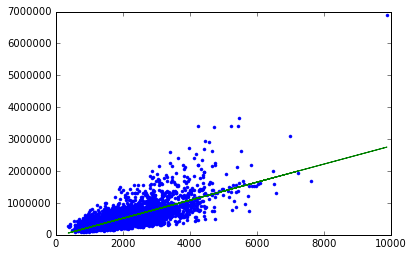

In [10]:
plt.plot(test_data['sqft_living'],test_data['price'],".",
        test_data['sqft_living'],sqft_model.predict(test_data),"-")

In [11]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-49136.666324,5084.1916665
sqft_living,None,283.10017981,2.23246648404


### Deeper view of the data

In [12]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [13]:
sales[my_features].show()

In [14]:
sales.show(view='BoxWhisker Plot', x='zipcode',y='price')

### Build a LR model with my_features

In [15]:
my_features_model = graphlab.linear_regression.create(train_data, target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16516

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.057585     | 3754271.089880     | 5361448.401212       | 180139.034593 | 250595.842959   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

#### comparing two models

In [19]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4134275.8880006783, 'rmse': 255213.76555405205}
{'max_error': 3499113.7882329505, 'rmse': 179797.60241501118}


#### how did the models do compared to the actual price of the houses

In [28]:
#house 1
house1 = sales[sales['id'] == '5309101200']

In [32]:
house1


Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src='house-5309101200.jpg'>

In [30]:
print house1['price']

[620000, ... ]


In [34]:
#what is the two models predicting the price of house1 should be
print sqft_model.predict(house1)
print my_features_model.predict(house1) #this supposed to give better prediction given added features

[630303.7652206176]
[720824.5001817191]


#### Prediction for house2

In [35]:
house2=sales[sales['id']=='1925069082']

In [37]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

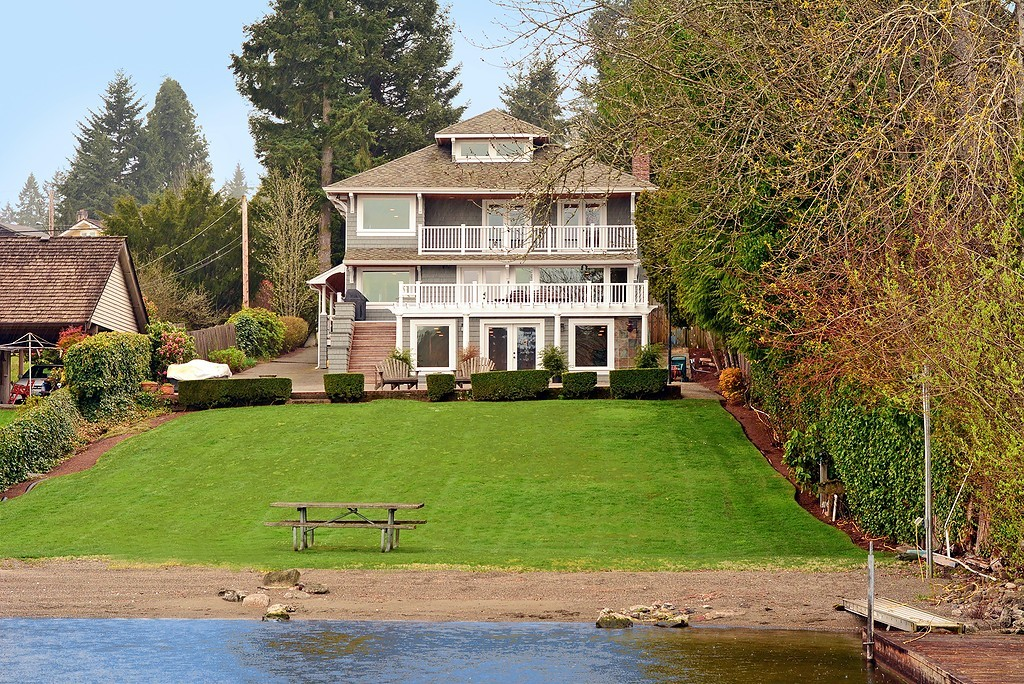

In [39]:
#what are the two models predicting house price should be
print sqft_model.predict(house2)
print my_features_model.predict(house2)

[1264448.1679955572]
[1446926.9813183695]
